In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np

file_url = 'families.xlsx'

def countlist(l):
    counts = dict()
    for i in l:
        counts[i] = counts.get(i, 0) + 1
    return counts

def avg_col(xl, col):
    temp_col = getcol_full(xl, col)
    col_list = []
    for i in temp_col:
        if not math.isnan(i):
            col_list.append(float(i))
    return sum(col_list) / len(col_list)

def getsheet(xl, n):
    return xl.parse(xl.sheet_names[n])

#use to get a list of all the values in a columns across ALL sheets
def getcol_full(xl, c):
    clist = []
    for s in xl.sheet_names:
        try:
            clist.extend(xl.parse(s)[c])
        except Exception as e:
            print(e)
    return clist

#use to get a list of all the values in a column from a single (n) sheet
def getcol(xl, c, n):
    try:
        clist = getsheet(xl, n)[c]
    except Exception as e:
        print(e)
    return clist

def graph_cols(xl, c1, c2):
    x = np.array(getcol_full(xl, c1))
    y = np.array(getcol_full(xl, c2))
    fig, ax = plt.subplots()
    ax.set_title(c1 + " vs " + c2)
    plt.scatter(x, y)
    plt.show()
    
def piegraph(counts, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    cs = list(counts.values())
    labels = list(counts.keys())
    plt.pie(cs, labels=labels)
    plt.show()    

matplotlib.rcParams['figure.figsize'] = [10, 10]
fam_xl = pd.ExcelFile(file_url)

In [2]:
genome_counts = countlist(getcol_full(fam_xl, 'genome'))
tnum_counts = countlist(getcol_full(fam_xl, 'tnumber'))

avg_weight = avg_col(fam_xl, 'weight')
avg_radius = avg_col(fam_xl, 'radius')
avg_atoms = avg_col(fam_xl, 'atoms')
avg_mers = avg_col(fam_xl, 'mers')
avg_max = avg_col(fam_xl, 'mer_weight_maxs')
avg_min = avg_col(fam_xl, 'mer_weight_mins')

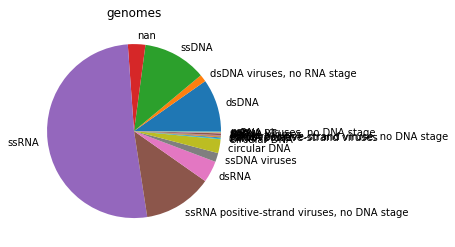

In [3]:
piegraph(genome_counts, 'genomes')

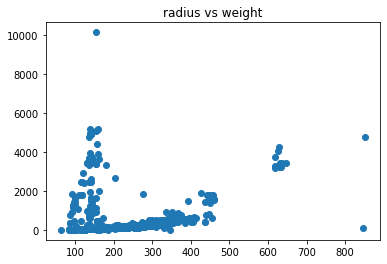

In [4]:
graph_cols(fam_xl, 'radius', 'weight')

In [8]:
fam1 = fam_xl.sheet_names[0]
fam1_weights = getsheet(fam_xl, 0)['weight']
fam1_avg_weight = sum(fam1_weights) / len(fam1_weights)
print(fam1 + ' average weight: ' + str(fam1_avg_weight))

Adenoviridae average weight: 1197.0117647058823
